<a href="https://colab.research.google.com/github/MicroprocessorX069/Image-morphology-segmentation-and-Hough-transform/blob/master/Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
def convolution11(input_image, kernel,threshold):
  
  w_input=len(input_image[0])
  h_input=len(input_image)
  input_image=np.array(input_image)
  padded_input=pad_image(input_image,int((len(kernel)-1)/2),int((len(kernel[0])-1)/2))
  padded_input=np.array(padded_input)
  kernel=flip(kernel)
  sum_kernel=np.sum(kernel)
  new_image=np.zeros((len(input_image)+1,len(input_image[0])+1))

  for input_x in range(0,h_input):
    for input_y in range(0,w_input):
        new_image[input_x,input_y]=0
        sum_img=0
        for kernel_x in range(0,len(kernel)):
           for kernel_y in range(0,len(kernel[0])):
              new_image[input_x,input_y]=int(new_image[input_x,input_y]) + int(padded_input[input_x+kernel_x, input_y+kernel_y])*int(kernel[kernel_x,kernel_y])
        
        if new_image[input_x,input_y]>= threshold:
          new_image[input_x,input_y]=0
        else:
          new_image[input_x,input_y]=1
        
 
  return(new_image)

def flip(matrix):
  new_matrix=np.zeros((matrix.shape))
  matrix=np.array(matrix)
  l=len(matrix)
  for i in range(l):
    for j in range(l):
      new_matrix[i,j]=matrix[l-i-1,l-j-1]
  return(new_matrix)

def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         input_image[x,y]=255-input_image[x,y]
          
  return(input_image)

def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y*2,image_x+pad_x*2))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(pad_y,image_y+pad_y):
    for j in range(pad_x, image_x+pad_x):
      padded_image[i,j]=image[i-pad_y,j-pad_x]
  return(padded_image)

def threshold(input_image,threshold):
  w=len(input_image[0])
  h=len(input_image)
  input_image=np.array(input_image)
  
  for x in range(h):
    for y in range(w):
      if input_image[x,y]>= threshold:
        input_image[x,y]=1
      else:
        input_image[x,y]=0
  return list(input_image)

# def erode(input_image,kernel):
#   w_kernel=len(kernel[0])
#   new_image=convolution11(input_image,kernel,1)
#   return(new_image)
# def dilate(input_image,kernel):
#   w_kernel=len(kernel[0])
#   new_image=convolution11(input_image,kernel,w_kernel)
#   return(new_image)
# def detect(input_image,kernel):

In [0]:
import numpy as np
import math
def hough_lines(input_img):
  w_img=len(input_img[0])
  l_img=len(input_img)
  mid_x=int(w_img/2)
  mid_y=int(l_img/2)
  input_img=np.array(input_img)
  origin=np.array([0,0])
  d_limit=int(pow(pow(w_img,2)+pow(l_img,2),0.5))
  hough_mat=np.ones((600,361,3)) # d x theta
  hough_list=[]
  
  for input_y in range(l_img):
    for input_x in range(w_img):
       if input_img[input_y,input_x]==0 and input_x!=0: # if the pixel color is white
           #estimating gradient of that pixel position
          actual_x=input_y-mid_x
          actual_y=input_x-mid_y
          gradient=-180
          while gradient <= 180:
            gradient=math.radians(gradient)
            #Finading d
            d=int(actual_x*math.cos(gradient)+actual_y*math.sin(gradient))
            gradient=int(math.degrees(gradient))
            #print(d,gradient)
            hough_mat[w_img+d,gradient,2]+=1
            hough_mat[w_img+d,gradient,1]=gradient
            hough_mat[w_img+d,gradient,0]=d
            hough_list.append([gradient,d])
            gradient=gradient+10
  return hough_mat,hough_list


import numpy as np
import math
def hough_lines2(input_img):
  w_img=len(input_img[0])
  l_img=len(input_img)
  mid_x=int(w_img/2)
  mid_y=int(l_img/2)
  input_img=np.array(input_img)
  origin=np.array([0,0])
  d_limit=int(pow(pow(w_img,2)+pow(l_img,2),0.5))
  hough_mat=np.ones((800,360,3)) # d x theta
  hough_list=[]
  
  max=0
  for input_y in range(l_img):
    for input_x in range(w_img):
       if input_img[input_y,input_x]==0 and input_x!=0: # if the pixel color is white
          actual_x=input_y-mid_x
          actual_y=input_x-mid_y
          #estimating gradient of that pixel position
          gradient=math.atan(input_y/input_x)
          #Finading d
          #d=int(input_x*math.cos(gradient)-input_y*math.sin(gradient))
          d=int(actual_x*math.cos(gradient)+actual_y*math.sin(gradient))
          gradient=int(math.degrees(gradient))
          #print(d,gradient)
          hough_mat[w_img+d,gradient,2]+=1
          hough_mat[w_img+d,gradient,1]=gradient
          hough_mat[w_img+d,gradient,0]=w_img+d
          hough_list.append([gradient,d])
                               
  return hough_mat,hough_list

def negative_forBinary(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         if input_image[x,y]==1:
            input_image[x,y]=0
         else:
            input_image[x,y]=1
          
  return(input_image)


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#black =0
#white=1
vertical_kernel=np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
input_image=cv2.imread("houghSmall.jpg",cv2.IMREAD_GRAYSCALE) #make sure the path to the image is in String format
vertical_detection=convolution11(input_image,vertical_kernel,100)
hough_mat,hough_list=np.array(hough_lines(vertical_detection))


Shape of Input IMage: (247, 296)
Shape of Padded IMage: (249, 298)
Shape of Kernel: (3, 3)


In [0]:
plt.imshow(vertical_detection)

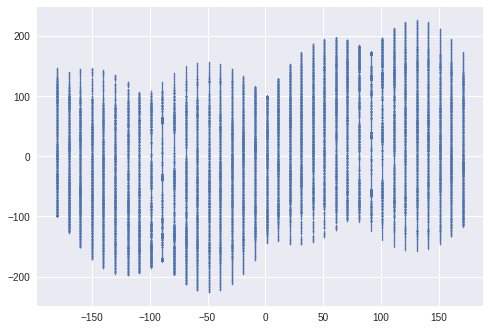

In [30]:
hough_list=np.array(hough_list)
plt.scatter(hough_list[:,0],hough_list[:,1],1)
plt.show()

In [22]:
hough_list[:,0]

array([-180, -170, -160, ...,  151,  161,  171])

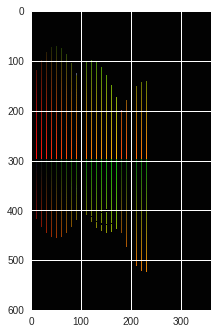

In [15]:
plt.imshow(negative(hough_mat))

In [0]:
print(np.amax(hough_mat[:,:,2]))

9.0


In [0]:
print(hough_mat.shape)
hough_list=hough_mat.reshape(-1,hough_mat.shape[-1])
max_votes=hough_list[np.argmax(hough_list[:,2]),2]
d=hough_list[np.argmax(hough_list[:,2]),0]
grad_max=hough_list[np.argmax(hough_list[:,2]),1]
print("gradient: ",grad_max)
def find_twoPoints(d,grad):
  x1=200
  x2=0
  grad=math.radians(grad)
  y1=(d-x1*math.cos(grad))/math.sin(grad)
  y2=(d-x2*math.cos(grad))/math.sin(grad)
  return x1, y1, x2, y2

x1,y1,x2,y2=find_twoPoints(d,grad_max)
print(x1,y1,x2,y2)

vertical_detection2= cv2.line(vertical_detection,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),2)
plt.imshow(vertical_detection2)

(1800, 21, 3)
gradient:  0.0
200 inf 0 inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


OverflowError: ignored

In [0]:
arr=np.array([[1,0,2],[2,8,32],[4,6,112],[1,3,12]])
arr2=arr[np.argsort(arr[:,:,2])]

IndexError: ignored

In [0]:
import numpy as np    
A = np.array([[[1,1,3],[3,4,36]],[[7,9,9],[9,0,3]],[[4,23,12],[2,53,6]]])
A_list=A.reshape(-1,A.shape[-1])
#np.argmax(A[:,:,2])
#np.argmax(A[np.argmax(A[:,:,2]),:,2])# 2, which is the position of 9
A_list.shape
#A_list[np.argmax(A_list[:,2]),0]
indices = np.argpartition(A_list, -2)[-2:]

In [0]:
indices

array([[0, 2, 1],
       [0, 2, 1]])